# Conservação de Energia Mecânica

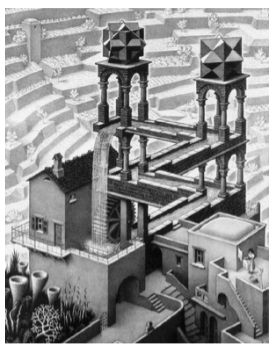
O uso da concepção de energia para a resolução de problemas de cinemática é importante, sobretudo, em situações nas quais a força depende da posição, como no caso das forças elásticas. Na ausência de forças dissipativas (ou quando elas podem ser desprezadas), a energia mecânica se conserva. Com a energia mecânica conservada, o cálculo de velocidades e posições do corpo em questão pode ser feito para qualquer instante de tempo. Isto é particularmente utilizado em sistemas oscilantes. As energias potencial e cinética podem variar, mas a soma delas se mantém constante no tempo.

## Experiência  Proposta

$\textbf{Objetivos:}$
- Observar e medir a conservação da energia mecânica.
- Analisar as transferências de energia em um sistema oscilante.
- Efetuar medidas primárias de deslocamento em 2D e tempo.
- Calcular medidas secundárias de velocidade em 2D.
- Construir e analisar gráficos de grandezas cinemáticas.
- Construir e analisar gráficos de energia mecânica.
- introduzir a automação e digitalização na aquisição de dados.

## Montagem do Código

![imagem](fig/trilho.jpg)
Os equipamentos utilizados para este experimentos consistem em um plano inclinado, uma mola e um carrinho com peso variável. O carrinho é preso a uma mola e a mola, por sua vez, é presa em uma haste perpendicular ao plano. O carrinho é colocado sobre o plano inclinado que desloca em movimento oscilatório. Para a construção do modelo iremos, na seguinte ordem:

 -  Importar as bibliotecas necessárias e criar o palco onde vizualizaremos o movimento. 
 -  Definir os objetos e suas características presentes na cena. 
 -  Determinar a física envolvida no objeto.

### Importando as Bibliotecas e Criando um Palco para o Movimento.

O primeiro passo é a importação das bibliotecas utilizadas, este procedimento é padrão para python. Utilizamos duas bibliotecas: vpython para a visualização e numpy utilizado para o cálculo. 

In [1]:
from vpython import * #Importar a biblioteca visual para o Python.
import numpy as np    #Importar a biblioteca utilizada para cálculos.

<IPython.core.display.Javascript object>

Com a biblioteca importada, iremos criar o palco onde ocorrerá o movimento.  O palco criado será disponibilizado abaixo do próximo bloco de código. Esta tela pode ser redimensionada e os objetos podem ser rotacionados utilizando o mouse. Especificamente para este experimento, foi retirado a opção de aproximar ou afastar a câmera. 

In [2]:
 cena = canvas(
                title='Conservação de Energia Mecânica', # Criar o palco onde ocorrerá o movimento
                width=800, height=400,                   # Tamanho da imagem
                userzoom = False,                        # O usuário não pode aproximar ou afastar a câmera
                userspin = True,                         # O usuário pode girar a câmera.
                      up = vec(0,1,0),                   # Determina a posição UP.
                ambient  = color.gray(.3),               # Cor da iluminação dos objetos
                  center = vector(0,0,0),                # Posição central do código
              background = vec(.6,.9,.6)                 # Cor do background
         )       
    

<IPython.core.display.Javascript object>

### Objetos e Suas Características

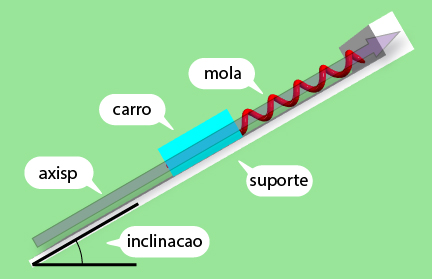
Acima estão dispostos  os objetos que compõem o experimento. Cada objeto é uma variável cujo nome é representado na figura. Devido a nomenclatura do código em python foi utilizado nomes em minusculas para a identificação. Começaremos identificando o ângulo de inclinação "inclinacao" e o eixo de principal "axisp", onde ocorre o movimento.

In [3]:
inclinacao = np.divide(45*np.pi,180)                         # Ângulo em radianos. 
axisp = vec(np.cos(inclinacao),np.sin(inclinacao),0)         # Vetor onde ocorre o movimento

O próximo código descreve a massa deslocada no movimento. Este objeto apresenta as propriedades como tamanho,  massa e velocidade. Note que os objetos são rotacionados de acordo com a inclinação proposta no bloco anterior.

In [4]:
carro = box(                                 # Cria o objeto carro, correspondente a massa
     length = 1.5,height=.4, width=.5,       # Tamanho da massa
                pos = vec(0,0,0),            # Posição inicial do centro do objeto
                vel = vec(0,0,0),            # Velocidade inicial do objeto
              massa = 7,                     # Massa do objeto
              color = color.cyan             # Cor do Objeto
           ) 

carro.rotate(
              angle = inclinacao,             # Informação par a rotação  do objeto
               axis = vec(0,0,1)              # Eixo em que o objeto gira
             )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

O próximo bloco de código cria o suporte do movimento correspondente a superfície branca abaixo do "carro ". O bloco de código abaixo compila também um pequeno apoio para a mola na parte superior da superfície. Enquanto "suporte" possuí a propriedade "atrito", o apoio para a mola é estético e tem como objetivo apenas localizar onde a mola está presa.

In [5]:
suporte=box(
             pos = carro.pos - vec(0,.2,0),    # Posição relativao ao eixo principal 
          length = 10, height=.1, width=1,      # Tamanho do suporte
           color = color.white,                # cor do objeto
          atrito = .006
           )

suporte.rotate(
               origin = vec(0,0,0),
                angle = inclinacao,           # Informação de rotação do objeto
                 axis = vec(0,0,1),           # Eixo de Rotação
              )

sup=box(
         pos = vec(np.cos(inclinacao)*suporte.length/2,np.sin(inclinacao)*suporte.length/2,0),     # Posição do apoio  
      length = .3, height=.45, width=1,                                                            # Suporte da mesa
       color = color.white,                                                                        # cor do objeto
        )

sup.rotate(
             angle = inclinacao,           # Informação de rotação do objeto
          #  origin = vec(0,0,0),
              axis = vec(0,0,1)             # Eixo de Rotação
            )

O próximo passo será criar a mola e as suas propriedades. A mola, diferente da maior parte dos objetos, possui o ponto de referência para a posição em uma de suas extremidades. Será utilizado as dimensões de posição do "suporte" como referência.

In [6]:
mola=helix(  
          length0 = suporte.length/2,                        # Tamanho original da mola e tamanho
           length = suporte.length,                        # Tamanho da mola comprimida/exticada 
              pos = vec(np.cos(inclinacao)*suporte.length/2,np.sin(inclinacao)*suporte.length/2,0),     
             radius = 0.1,                    # Raio da mola
             k = 8,                          # Constante de Hook da mola
             thickness = 0.08,                # espessura
             coils = 12,                      # Número de voltas         
             color = color.red                # Cor do objeto
           )

mola.rotate(
              angle =np.pi+inclinacao,          # Informação par a rotação  do objeto
              axis= vec(0,0,1)                  # Eixo em que o objeto gira
             )


O próximo passo é determinar os valores de gravidade e propriedade de tempo.

In [7]:
g = 9.8    #gravidade

t = 0       #velocidade Inicial 
dt = 0.1  #Intervalo segundo por iteração

### Determinar  a Física do movimento e Obtenção dos Dados

Será utilizado a segunda lei de newton para descrever o movimento.

In [8]:
while (t < 5) :

  rate(10)  #Numero de Iterações por segundo.

  #Força Peso, direcionada ao centro da Terra.
  peso = carro.massa*g
  # Componente no eixo do movimento
  pesox = -sin(inclinacao)*peso

  
  #Atrito  
  if carro.vel.x > 0:
    atrito = - cos(inclinacao)*peso*suporte.atrito
  else:
    atrito = + cos(inclinacao)*peso*suporte.atrito

  # Força da mola
  hook = np.sign(carro.pos.x)*(carro.pos.x-mola.length0)*mola.k
  mola.length = mola.length0 - np.sign(carro.pos.x)*mag(carro.pos) 

  #Determinação da aceleração
  acc = (pesox+atrito+hook)/carro.massa
  
  carro.vel = carro.vel + acc*dt*axisp
  carro.pos = carro.pos + carro.vel*dt + acc/2*axisp*dt**2
  t=t+dt
    
  #Dados de posição, instante, e velocidade
  print (carro.pos,carro.vel,t)
 

<-0.073059, -0.073059, 0> <-0.48706, -0.48706, 0> 0.1
<-0.133329, -0.133329, 0> <-0.564155, -0.564155, 0> 0.2
<-0.200578, -0.200578, 0> <-0.636379, -0.636379, 0> 0.30000000000000004
<-0.274235, -0.274235, 0> <-0.703169, -0.703169, 0> 0.4
<-0.353677, -0.353677, 0> <-0.764007, -0.764007, 0> 0.5
<-0.438241, -0.438241, 0> <-0.818424, -0.818424, 0> 0.6
<-0.527221, -0.527221, 0> <-0.866008, -0.866008, 0> 0.7
<-0.61988, -0.61988, 0> <-0.906401, -0.906401, 0> 0.7999999999999999
<-0.715456, -0.715456, 0> <-0.939306, -0.939306, 0> 0.8999999999999999
<-0.813164, -0.813164, 0> <-0.964487, -0.964487, 0> 0.9999999999999999
<-0.912206, -0.912206, 0> <-0.981773, -0.981773, 0> 1.0999999999999999
<-1.01178, -1.01178, 0> <-0.991055, -0.991055, 0> 1.2
<-1.11107, -1.11107, 0> <-0.99229, -0.99229, 0> 1.3
<-1.20928, -1.20928, 0> <-0.985501, -0.985501, 0> 1.4000000000000001
<-1.30562, -1.30562, 0> <-0.970776, -0.970776, 0> 1.5000000000000002
<-1.39932, -1.39932, 0> <-0.948265, -0.948265, 0> 1.6000000000000003

## Redução e Análise dos Dados

- Faça um gráfico de pontos da variação de x contra o tempo. 
- Modele  uma  função  para  a  variação  de x contra  o  tempo. 
- Repita o procedimento acima para o eixo y.
- Qual o ponto de repouso?

- Vamos proceder para o cálculo das energias e mostrar que a   energia mecânica total se conserva. Comecemos pela energia potencial elástica(EPE). Para este sistema (carrinho e duas molas), teremos:
$$
\begin{align}
E_{PE} = \frac{1}{2} k_e (s-L_0)^2
\end{align}
$$
onde $k_e$ é a  constante  elástica  equivalente, $s~$é a  variável  comprimento  ao longo do trilho, $L_0$ é o ponto de repouso do carrinho quando o trilho está na horizontal, o qual ainda não conhecemos.
- Calcule  o  valor  da  medida  de $k_e$,  sabendo  que  a  frequência  angular é $w = \sqrt{\frac{k_e}{m_c}}$. onde $m_C$é a massa do carrinho e $w$ vem dos ajustes feitos


- $\textit{(Relatório)}$  Faça  um  diagrama  de  forças  sobre  o  carrinho quando  este se  encontra  em repouso,  na  posição  de  equilíbrio($S_0$),  com  o  trilho inclinado. Em função do diagrama, mostre que o valor de $L_0$ é dado por:
$$
\begin{align}
L_0 = S_0 + \frac{m_c \cdot g \cdot sen\theta}{k_e} \text{, com } S_0= \sqrt{(x_0)^2 + (y_0)^2}
\end{align}
$$

- Determine  o  valor  da  medida  de $L_0$,  a  partir  dos  valores  de $x_0$ e $y_0$ ajustados nos gráficos; da massa do carrinho e do ângulo de inclinação do trilho medidos; da constante elástica equivalente determinada no passo anterior; e do valor canônico para a aceleração da gravidade ($g= 9,78520 m/s^2$)

- Calcule  o  valor  da  energia  potencial  elástica  do  carrinho para  cada instante de tempo.

- Vamos  calcular  o  valor  da  energia  potencial  gravitacional (EPG).  Para tanto, precisamos de um ponto referencial. Adotaremos o ponto mais baixo que o carrinho atinge. Assim, a energia potencial gravitacional fica: $$
\begin{align}
E_{PG} = m_c \cdot g \cdot (y-y_o+B)
\end{align}
$$

- Determine   o   valor   da   energia   cinética($E_C$) utilizando a equação:. 
$$
\begin{align}
E_c = \frac{1}{2} \cdot m_c \cdot (v^2_x+v^2_y)
\end{align}
$$

 - Determine os valores para a Energia Mecânica Total $(E_{MT})$. 
 - Faça um gráfico de linha para as quatro energias calculadas.
 - $\textit{(Relatório)}$ Disserte sobre o gráfico das energias,nfatizando a variação no tempo de cada uma (transformações de energia) e o comportamento da energia mecânica total.
 - $\textit{(Relatório)}$   Verifique   e   disserte   sobre   a   conservação   da   energia mecânica total. Calcule a derivada temporal da energia mecânica. 
 - $\textit{(Relatório)}$  Disserte  sobre  o  comportamento  da  derivada  temporal  da energia  mecânica  total  do  carrinho.